#### Name: Ujjayant Kadian
#### Student Number: 22330954

In [ ]:
!pip install sympy numpy matplotlib pandas;

# **Numerical Derivatives and Gradient Descent**

This notebook demonstrates:
1. **Symbolic vs. Numerical Differentiation** for (y(x) = $x^4$).
2. **Finite-Difference Approximation** and its dependence on ($\delta$).
3. **Gradient Descent** on ($x^4$), including:
   - Implementation with a fixed step size ($\alpha$).
   - Investigation of convergence behavior with different initial \(x\) and step sizes.
4. **Adaptation to other functions**: (y(x) = $\gamma$ $x^2$) and (y(x) = $\gamma$|x|).

---

## Part (a) \(y(x) = x^4\)

### (i) Symbolic Derivative Using Sympy


In [1]:
import sympy

x = sympy.Symbol('x', real=True)

y = x**4

dy_dx = sympy.diff(y, x)

print(f"y(x)   = {y}")
print(f"dy/dx  = {dy_dx}")


y(x)   = x**4
dy/dx  = 4*x**3


The symbolic derivative is:

\[
$\frac{d}{dx}$ ($x^4$) = $4x^3$
\]

---

### (ii) Finite-Difference Approximation

We compare the exact derivative ($4x^3$) with the numerical estimate:

\[
$D_\delta[f](x) \;=\; \frac{f(x + \delta) - f(x)}{\delta}$
\]

Below, we set \($\delta=0.01$) by default, and evaluate both over a range of ($x$).


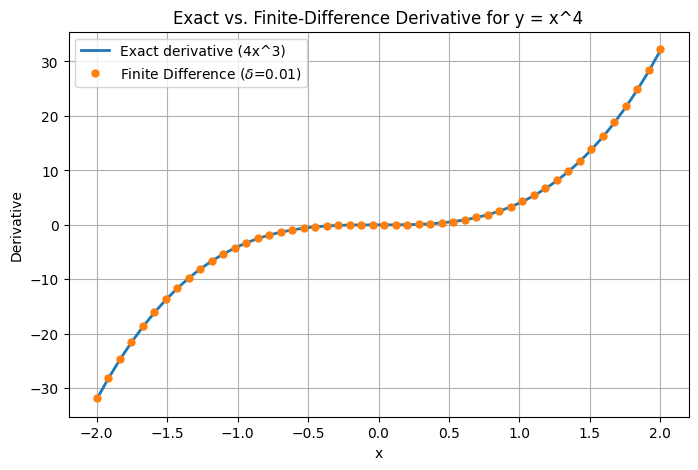

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# the function
def f(x):
    return x**4

# Finite-difference approximation
def finite_diff(f, x, delta=0.01):
    return (f(x + delta) - f(x)) / delta

x_vals = np.linspace(-2, 2, 50)

# Exact derivative = 4x^3
exact_derivs = 4 * x_vals**3

# Finite-difference derivative
delta = 0.01
fd_derivs = [finite_diff(f, xv, delta) for xv in x_vals]

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_vals, exact_derivs, label='Exact derivative (4x^3)', linewidth=2)
plt.plot(x_vals, fd_derivs, 'o', label=r'Finite Difference ($\delta$=0.01)', markersize=5)
plt.xlabel('x')
plt.ylabel('Derivative')
plt.title('Exact vs. Finite-Difference Derivative for y = x^4')
plt.legend()
plt.grid(True)
plt.show()


You can observe that the finite-difference curve closely matches the exact derivative $(4x^3$).

---

### (iii) Effect of Varying ($\delta$)

Next, we investigate the effect of changing ($\delta$). We will look at a single point (e.g., $(x = 1$)) and vary ($\delta$) over several orders of magnitude.


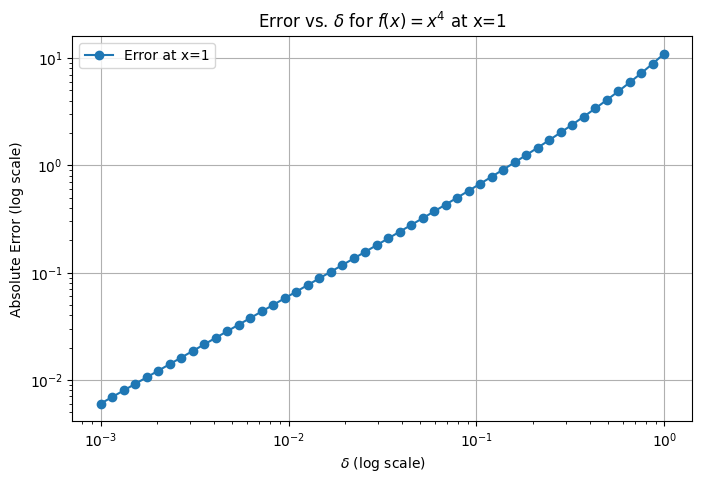

In [3]:
deltas = np.logspace(-3, 0, 50)  # δ from 0.001 to 1.0
x_test = 1.0

errors = []
for d in deltas:
    fd_approx = finite_diff(f, x_test, d)
    exact = 4 * x_test**3
    errors.append(abs(fd_approx - exact))

plt.figure(figsize=(8,5))
plt.plot(deltas, errors, 'o-', label='Error at x=1')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\delta$ (log scale)')
plt.ylabel('Absolute Error (log scale)')
plt.title(r'Error vs. $\delta$ for $f(x) = x^4$ at x=1')
plt.grid(True)
plt.legend()
plt.show()


**Observations**:
- For very small $(\delta)$, round-off errors become significant (not visible in this context but becomes visible when seen from $-10^10$).
- For very large $(\delta)$, the approximation is poor (the errors are huge) because the difference quotient becomes too large.

---

## Part (b) Gradient Descent on ($y(x) = x^4$)

### (i) Implementation with Fixed Step Size ($\alpha$)

The gradient (derivative) of ($x^4$) is ($4x^3$). The update rule in gradient descent is:

$x_{\text{new}}$ = $x_{\text{old}} - \alpha \times \frac{dy}{dx}(x_{\text{old}})$

In code:


In [4]:
def grad_y(x):
    return 4 * x**3

def gradient_descent(initial_x, alpha, n_steps=30, tolerance=1e10):
    x_current = initial_x
    xs = [x_current]
    for _ in range(n_steps):
        g = grad_y(x_current)
        x_current = x_current - alpha * g
        if abs(x_current) > tolerance:
            # Stop if values become too large
            break
        xs.append(x_current)
    return xs

### (ii) Run with ($x_0 = 1$) and ($\alpha = 0.1$)

We now test the above function with 20 iterations, and track both ($x$) and ($y = x^4$).


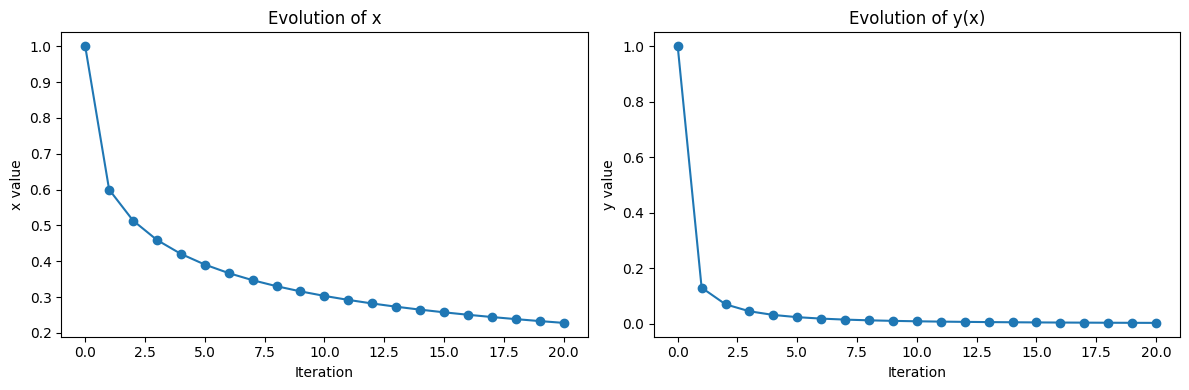

In [5]:
# Perform gradient descent
x_vals_gd = gradient_descent(initial_x=1.0, alpha=0.1, n_steps=20)

# Compute y = x^4 at each iteration
y_vals_gd = [xv**4 for xv in x_vals_gd]

# Plot x and y over iterations
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x_vals_gd, 'o-', label='x')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title('Evolution of x')

plt.subplot(1,2,2)
plt.plot(y_vals_gd, 'o-', label='y(x) = x^4')
plt.xlabel('Iteration')
plt.ylabel('y value')
plt.title('Evolution of y(x)')

plt.tight_layout()
plt.show()

**Discussion**:  
- Since $(x^4$) grows quickly away from ($0$), the gradient can be large unless ($x$) is very small.  
- With ($\alpha = 0.1$), we expect convergences to ($x \approx 0$), thus driving ($y(x)$) to ($0$).  

---
### (iii) Varying the Initial Value and Step Sizes

We now illustrate how different initial values of ($x$) and step sizes ($\alpha$) can influence convergence (or divergence).

In [6]:
initial_values = [2.0, -1.0, -0.5, 1.0, 1.5]
alphas = [0.01, 0.1, 0.2, 0.5]

results = []

for x0 in initial_values:
    for alpha in alphas:
        xs_gd = gradient_descent(x0, alpha, n_steps=30)
        final_x = xs_gd[-1]
        results.append({
            "Initial x0": x0,
            "Alpha": alpha,
            "Final x": final_x,
            "Iterations": len(xs_gd)
        })

import pandas as pd

results_df = pd.DataFrame(results)
print(results_df)

    Initial x0  Alpha       Final x  Iterations
0          2.0   0.01  5.971686e-01          31
1          2.0   0.10 -1.907218e-01          31
2          2.0   0.20 -2.071761e+05           4
3          2.0   0.50  5.474000e+03           3
4         -1.0   0.01 -5.363442e-01          31
5         -1.0   0.10 -1.909326e-01          31
6         -1.0   0.20 -1.172800e-01          31
7         -1.0   0.50 -1.000000e+00          31
8         -0.5   0.01 -3.944026e-01          31
9         -0.5   0.10 -1.849222e-01          31
10        -0.5   0.20 -1.343476e-01          31
11        -0.5   0.50 -8.487700e-02          31
12         1.0   0.01  5.363442e-01          31
13         1.0   0.10  1.909326e-01          31
14         1.0   0.20  1.172800e-01          31
15         1.0   0.50  1.000000e+00          31
16         1.5   0.01  5.809849e-01          31
17         1.5   0.10  1.213568e-01          31
18         1.5   0.20  1.147177e-01          31
19         1.5   0.50 -4.588798e+07     

- Note: Some values are stopped until all iterations are complete because of *Overflow* error.
- The initial value $x_0$ and $\alpha$ combo has a significant influence on convergence or divergence as seen above.
- For very large ($\alpha$), the sequence may diverge.
- For small ($\alpha$), convergence is typically slower but more reliable.  

---

## Part (c) Changing the Function

### (i) $(y(x) = \gamma x^2)$

Let ($\gamma$) be a parameter. The derivative is:

$\frac{dy}{dx} = 2\gamma x$,

so the update step in gradient descent is:


$x \;\leftarrow\; x - \alpha(2\gamma x) = x(1 - 2\alpha\gamma)$

**Convergence condition**: We need ($|1 - 2\alpha\gamma| < 1$). Below is a simple implementation:


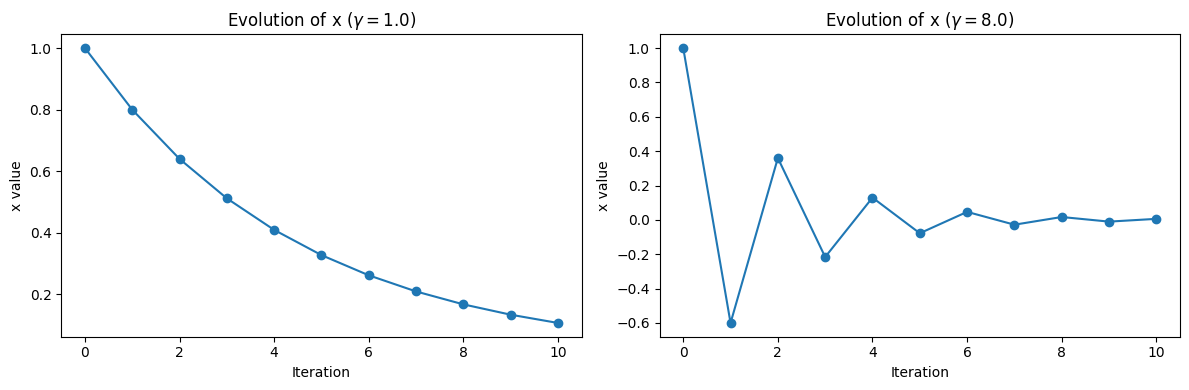

In [7]:
def gradient_descent_gamma_x2(initial_x, alpha, gamma, n_steps=20):
    x_current = initial_x
    xs = [x_current]
    for _ in range(n_steps):
        grad = 2 * gamma * x_current
        x_current = x_current - alpha * grad
        xs.append(x_current)
    return xs

# Example with gamma=1, alpha=0.1
test_xs = gradient_descent_gamma_x2(1.0, alpha=0.1, gamma=1.0, n_steps=10)
test_xs_2 = gradient_descent_gamma_x2(1.0, alpha=0.1, gamma=8.0, n_steps=10)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(test_xs, 'o-', label='x')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title(r'Evolution of x ($\gamma=1.0$)')

plt.subplot(1,2,2)
plt.plot(test_xs_2, 'o-', label='x')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title(r'Evolution of x ($\gamma=8.0$)')

plt.tight_layout()
plt.show()

As you increase ($\gamma$) while keeping ($\alpha$) fixed, you may push the term ($\alpha\gamma\$) beyond the stable range, causing the iteration to diverge.

---

### (ii) $(y(x) = \gamma |x|)$

Now, consider:

$y(x) = \gamma |x|$

- For ($x>0$), derivative is ($\gamma$).
- For ($x<0$), derivative is ($-\gamma$).
- At ($x=0$), it is non-differentiable in the strict sense, but subgradients lie in ($[- \gamma, \gamma]$).

Below is a simple piecewise gradient descent:


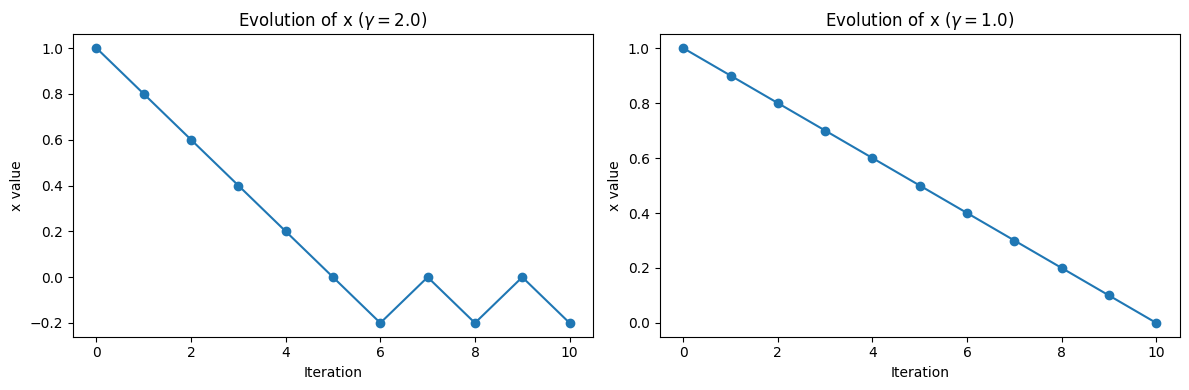

In [8]:
def gradient_descent_gamma_abs(initial_x, alpha, gamma, n_steps=20):
    x_current = initial_x
    xs = [x_current]
    for _ in range(n_steps):
        if x_current > 0:
            grad = gamma
        elif x_current < 0:
            grad = -gamma
        else:
            # At x=0, any subgradient in [-gamma, gamma] could be used.
            # Here, we pick 0 for simplicity (makes x stay at 0 if reached)
            grad = 0.0
        
        x_current = x_current - alpha * grad
        xs.append(x_current)
    return xs

test_abs = gradient_descent_gamma_abs(1.0, alpha=0.1, gamma=2.0, n_steps=10)
test_abs_2 = gradient_descent_gamma_abs(1.0, alpha=0.1, gamma=1.0, n_steps=10)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(test_abs, 'o-', label='x')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title(r'Evolution of x ($\gamma=2.0$)')

plt.subplot(1,2,2)
plt.plot(test_abs_2, 'o-', label='x')
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.title(r'Evolution of x ($\gamma=1.0$)')

plt.tight_layout()
plt.show()


- If ($\alpha \gamma$) is relatively large, the iteration might oscillate around ($x=0$) or diverge. If it is small, it tends to converge to ($x=0$).  

---

## Summary

1. **Symbolic vs. Numerical**:  
   - The exact derivative of ($x^4$) is ($4x^3$).  
   - Finite-difference approximations can be sensitive to the choice of ($\delta$).  

2. **Gradient Descent on ($x^4$)**:  
   - **Update**: ($x \leftarrow x - \alpha \cdot 4x^3$).  
   - Convergence depends on step size ($\alpha$) and initial ($x$).  

3. **Parameter Sensitivity**:  
   - For ($y(x)=\gamma x^2$), the update factor is ($(1 - 2\alpha\gamma)$); divergence occurs if ($|1 - 2\alpha\gamma|>1$).  
   - For ($y(x)=\gamma|x|$), the derivative is piecewise constant ($(\pm \gamma)$), so the iteration can jump around or converge quickly to 0 depending on ($\alpha \gamma$).  
